In [121]:
#importando dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import Image

In [122]:
# data_SRAG = pd.read_csv('data/SRAG-16-06-2020.csv', sep=';', error_bad_lines=False, encoding="utf-8",header=None,warn_bad_lines=False)
# data_SRAG = pd.read_excel('data/sraghosp_18.05.2020.xlsx')
data_mortalidade = pd.read_csv('data/data_mortalidade.csv')
pib = pd.read_csv('data/pib.csv')
salarios = pd.read_csv('data/salario.csv')

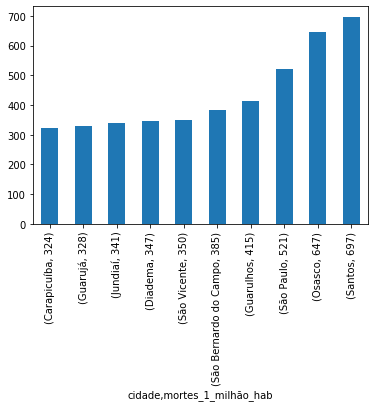

In [123]:
data_mortalidade = data_mortalidade.query("UF == 'SP'")
data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10).plot(kind='bar')
mortalidade_top = data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10)

In [124]:
# Gettin the top 10 mortality rank cities
top_cidades = data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10).to_dict()
cidades = [cidade[0] for cidade in top_cidades.keys()]
cidades



['Carapicuíba',
 'Guarujá',
 'Jundiaí',
 'Diadema',
 'São Vicente',
 'São Bernardo do Campo',
 'Guarulhos',
 'São Paulo',
 'Osasco',
 'Santos']

nome
São Vicente               6530.544922
Carapicuíba               7813.299805
Guarujá                  11131.339844
Guarulhos                24993.650391
Diadema                  25066.300781
São Paulo                35271.929688
São Bernardo do Campo    35680.050781
Osasco                   43994.468750
Jundiaí                  47395.718750
Santos                   54054.761719
Name: PIB_percapita, dtype: float64

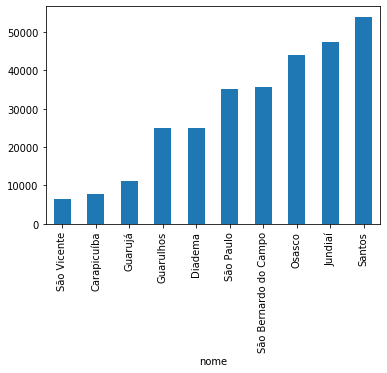

In [125]:
# pib[pib["nome"].isin(cidades)].groupby(["nome","PIB"])["PIB"].mean().sort_values().plot(kind='bar')
pib[pib["nome"].isin(cidades)].groupby(["nome"])["PIB_percapita"].mean().sort_values().plot(kind='bar')
pib = pib[pib["nome"].isin(cidades)].groupby(["nome"])["PIB_percapita"].mean().sort_values()
pib.T

In [126]:
salarios = salarios.groupby(["cidade"]).mean()

In [127]:
merge = pd.concat([pib.T,mortalidade_top.T], axis=0, ignore_index=False)
merge_salario = pd.concat([salarios,mortalidade_top.T], axis=0, ignore_index=False)
# merge.T
pib.T


nome
São Vicente               6530.544922
Carapicuíba               7813.299805
Guarujá                  11131.339844
Guarulhos                24993.650391
Diadema                  25066.300781
São Paulo                35271.929688
São Bernardo do Campo    35680.050781
Osasco                   43994.468750
Jundiaí                  47395.718750
Santos                   54054.761719
Name: PIB_percapita, dtype: float64

In [128]:
# data_mortalidade[data_mortalidade["cidade"].isin(cidades)].groupby(["cidade"])["mortes_1_milhão_hab"].mean().sort_values().plot(kind='bar')
mortalidade_top = data_mortalidade[data_mortalidade["cidade"].isin(cidades)].groupby(["cidade"])["mortes_1_milhão_hab"].mean().sort_values()
# mortalidade_top.T

[Text(0, 0, 'Carapicuíba'),
 Text(1, 0, 'Guarujá'),
 Text(2, 0, 'Jundiaí'),
 Text(3, 0, 'Diadema'),
 Text(4, 0, 'São Vicente'),
 Text(5, 0, 'São Bernardo do Campo'),
 Text(6, 0, 'Guarulhos'),
 Text(7, 0, 'São Paulo'),
 Text(8, 0, 'Osasco'),
 Text(9, 0, 'Santos')]

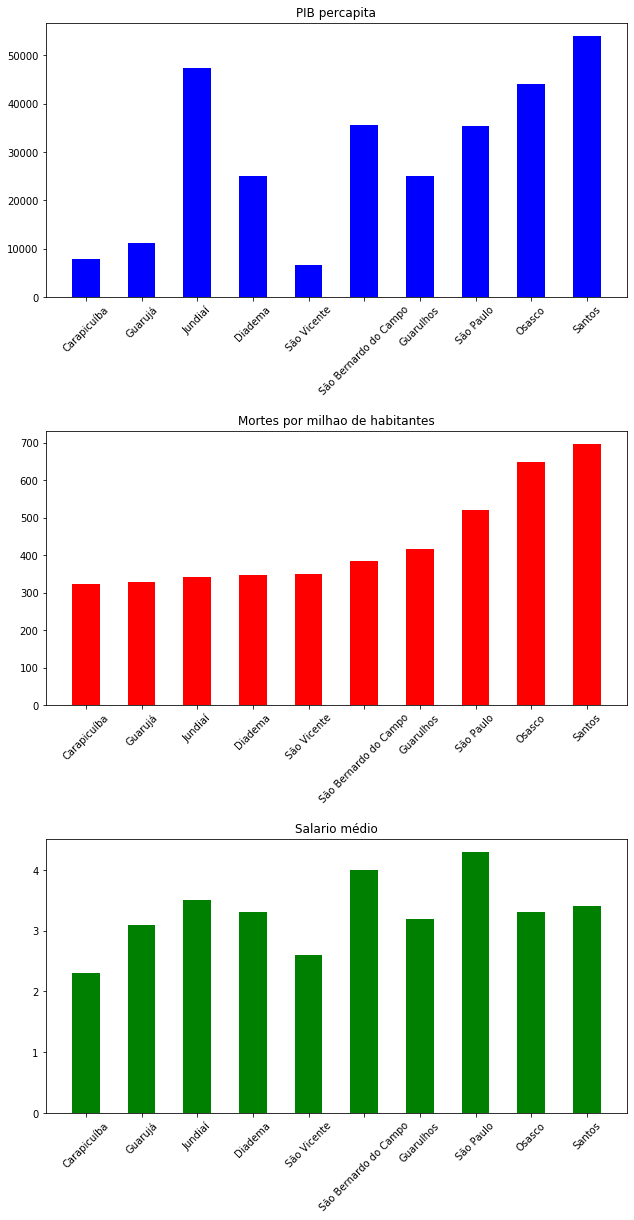

In [149]:
# mortalidade_top.T
# pib.T
result = pd.concat([mortalidade_top,pib], axis=1).reindex(mortalidade_top.index)
# result.groupby(["cidade","mortes_1_milhão_hab"])["PIB_percapita"].mean().sort_values().plot(kind='barh')
# result.index
# plt.subplots_adjust(top=2, bottom=0.01, left=2, right=5, hspace=0.10,wspace=0.10)
fig, axs = plt.subplots(3,1,figsize=(10,17))

#Criando o grafico
axs[0].bar(result.index,result['PIB_percapita'],facecolor="b",width=.5)
axs[1].bar(result.index,result['mortes_1_milhão_hab'],facecolor="r",width=.5)
result2 = pd.concat([mortalidade_top,salarios], axis=1).reindex(mortalidade_top.index)
axs[2].bar(result2.index,result2['salario'],facecolor="g",width=.5)
axs[0].set_title('PIB percapita')
axs[1].set_title('Mortes por milhao de habitantes')
axs[2].set_title('Salario médio')
fig.tight_layout(pad=5, w_pad=1, h_pad=10)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[2].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
#Exibindo o grafico
# plt.show()